# Max McQuide Data Analytics with Python Projects
#### FreeCodeCamp
#### March 2024

## Mean-Variance-Standard Deviation Calculator

In [18]:
import numpy as np

def calculate(a):
    a1 = a[:3]
    a2 = a[3:6]
    a3 = a[6:]

    array = np.array(
        [a1,a2,a3])
    
    key_list = ['mean', 'variance', 'standard deviation', 'max', 'min', 'sum']
    func_list = [np.mean, np.var, np.std, np.max, np.min, np.sum]
    
    return_d = {}
    
    for i in range(len(key_list)):
        return_d[key_list[i]] = [list(func_list[i](array, axis = 0)), list(func_list[i](array, axis = 1)), func_list[i](array)]
    
    return return_d

calculate([i for i in range(9)])

{'mean': [[3.0, 4.0, 5.0], [1.0, 4.0, 7.0], 4.0],
 'variance': [[6.0, 6.0, 6.0],
  [0.6666666666666666, 0.6666666666666666, 0.6666666666666666],
  6.666666666666667],
 'standard deviation': [[2.449489742783178,
   2.449489742783178,
   2.449489742783178],
  [0.816496580927726, 0.816496580927726, 0.816496580927726],
  2.581988897471611],
 'max': [[6, 7, 8], [2, 5, 8], 8],
 'min': [[0, 1, 2], [0, 3, 6], 0],
 'sum': [[9, 12, 15], [3, 12, 21], 36]}

## Demographic Data Analyzer

In [133]:
import pandas as pd


def calculate_demographic_data(print_data=True):
    # Read data from file
    df = pd.read_csv("adult.data.csv")

    # How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
    race_count = df['race'].value_counts()

    # What is the average age of men?
    average_age_men = df.loc[df['sex'] == 'Male','age'].mean()

    # What is the percentage of people who have a Bachelor's degree?
    percentage_bachelors = len(df[df['education'] == 'Bachelors']) / len(df)

    # What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
    # What percentage of people without advanced education make more than 50K?

    # with and without `Bachelors`, `Masters`, or `Doctorate`
    higher_education = df.loc[df['education'].isin(['Bachelors','Masters','Doctorate'])]
    lower_education = df.loc[~df['education'].isin(['Bachelors','Masters','Doctorate'])]

    # percentage with salary >50K
    higher_education_rich = len(higher_education.loc[higher_education['salary'] == '>50K']) / len(higher_education)
    lower_education_rich = len(lower_education.loc[lower_education['salary'] == '>50K']) / len(lower_education)

    # What is the minimum number of hours a person works per week (hours-per-week feature)?
    min_work_hours = df['hours-per-week'].min()

    # What percentage of the people who work the minimum number of hours per week have a salary of >50K?
    num_min_workers = df.loc[df['hours-per-week'] == df['hours-per-week'].min()]

    rich_percentage = len(num_min_workers.loc[num_min_workers['salary'] == '>50K']) / len(num_min_workers)

    # What country has the highest percentage of people that earn >50K?
    country_count = df['native-country'].value_counts()
    country_wealth = df.loc[df['salary'] == '>50K']['native-country'].value_counts()
    countries = (country_wealth / country_count)

    highest_earning_country = countries.sort_values(ascending = False).reset_index()['native-country'][0]
    highest_earning_country_percentage = countries.sort_values(ascending = False).reset_index()['count'][0]

    # Identify the most popular occupation for those who earn >50K in India.
    top_IN_occupation = df.loc[(df['native-country'] == 'India') & (df['salary'] == '>50K')].value_counts('occupation').reset_index()['occupation'][0]

    # DO NOT MODIFY BELOW THIS LINE

    if print_data:
        print("Number of each race:\n", race_count) 
        print("Average age of men:", average_age_men)
        print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")
        print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")
        print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")
        print(f"Min work time: {min_work_hours} hours/week")
        print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")
        print("Country with highest percentage of rich:", highest_earning_country)
        print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")
        print("Top occupations in India:", top_IN_occupation)

    return {
        'race_count': race_count,
        'average_age_men': average_age_men,
        'percentage_bachelors': percentage_bachelors,
        'higher_education_rich': higher_education_rich,
        'lower_education_rich': lower_education_rich,
        'min_work_hours': min_work_hours,
        'rich_percentage': rich_percentage,
        'highest_earning_country': highest_earning_country,
        'highest_earning_country_percentage':
        highest_earning_country_percentage,
        'top_IN_occupation': top_IN_occupation
    }

calculate_demographic_data(print_data=True)

Number of each race:
 race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64
Average age of men: 39.43354749885268
Percentage with Bachelors degrees: 0.16446055096587942%
Percentage with higher education that earn >50K: 0.46535843011613937%
Percentage without higher education that earn >50K: 0.173713601914639%
Min work time: 1 hours/week
Percentage of rich among those who work fewest hours: 0.1%
Country with highest percentage of rich: Iran
Highest percentage of rich people in country: 0.4186046511627907%
Top occupations in India: Prof-specialty


{'race_count': race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
 Name: count, dtype: int64,
 'average_age_men': 39.43354749885268,
 'percentage_bachelors': 0.16446055096587942,
 'higher_education_rich': 0.46535843011613937,
 'lower_education_rich': 0.173713601914639,
 'min_work_hours': 1,
 'rich_percentage': 0.1,
 'highest_earning_country': 'Iran',
 'highest_earning_country_percentage': 0.4186046511627907,
 'top_IN_occupation': 'Prof-specialty'}

## Medical Data Visualizer

C:\Users\Max\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


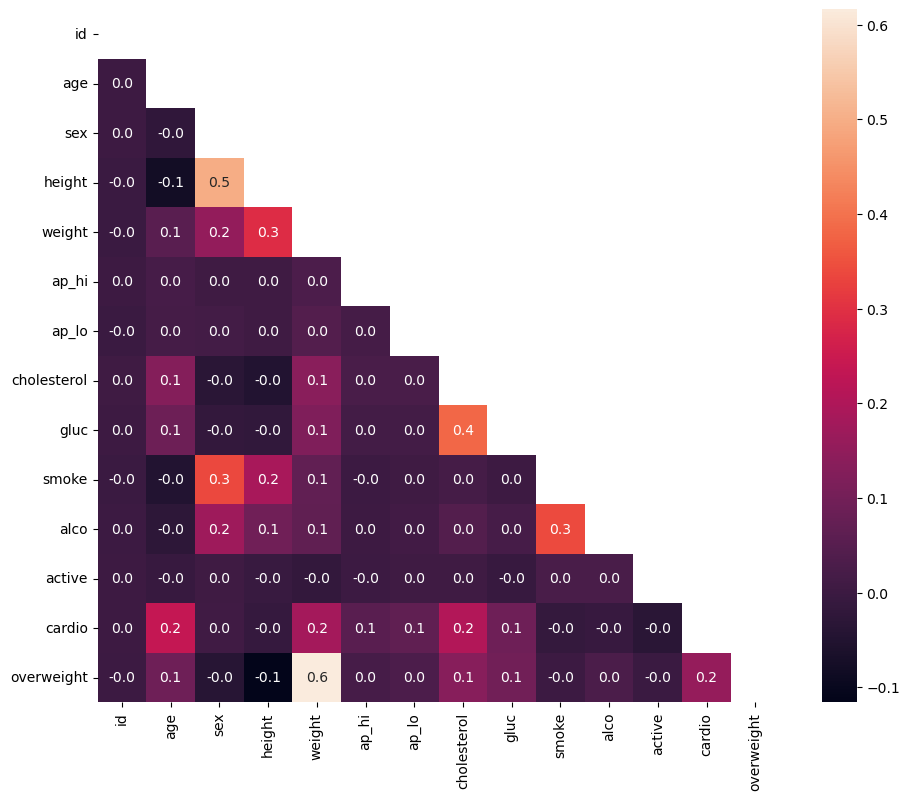

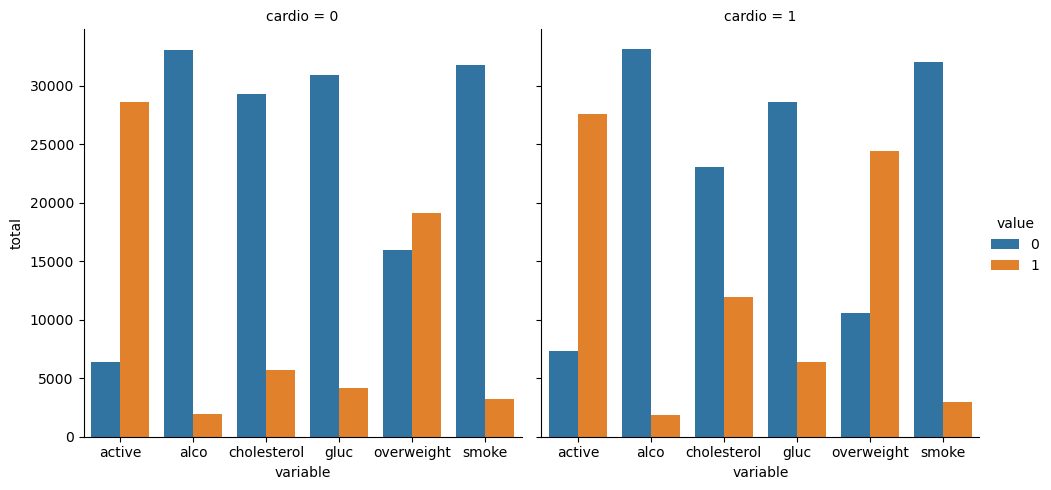

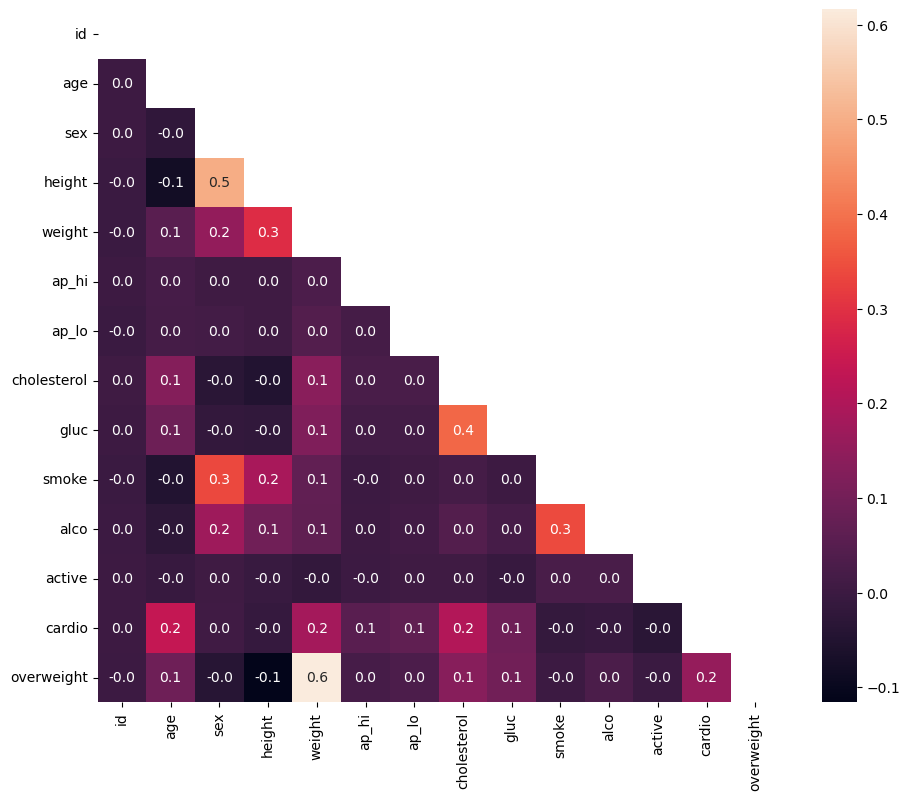

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

# Import data
df = pd.read_csv("medical_examination.csv")

# Add 'overweight' column
df['overweight'] = (df['weight'] / (df['height']/100)**2) > 25

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars = 'cardio', value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.value_counts().reset_index()
    df_cat = df_cat.rename(columns = {'count': 'total'})
    
    df_cat['variable'] = df_cat['variable'].astype('category')
    var_order = sorted(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat['variable'] = df_cat['variable'].cat.reorder_categories(var_order)
    

    # Draw the catplot with 'sns.catplot()'
    catplot = sns.catplot(x = 'variable', 
            y = 'total', 
            data = df_cat, 
            hue = 'value',
            col = 'cardio',
            kind = 'bar')
    


    # Get the figure for the output
    fig = catplot


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) & 
                 (df['height'] <= df['height'].quantile(0.975)) & 
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with 'sns.heatmap()'

    sns.heatmap(data = corr, 
                mask = mask,
                annot = True,
                fmt='.1f')


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_cat_plot()
draw_heat_map()

## Time Series Visualizer

<module 'matplotlib.pyplot' from 'C:\\Users\\Max\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

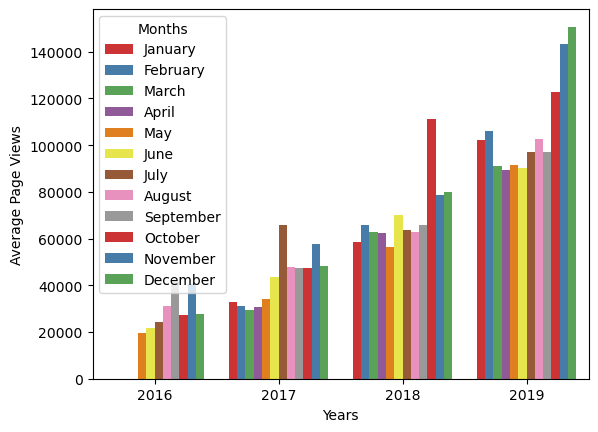

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv")

# Clean data
df = df[df['value'] < df['value'].quantile(.975)]
df = df[df['value'] > df['value'].quantile(.025)]
df.set_index('date', inplace = True)


def draw_line_plot():
    # Draw line plot
    
    fig, axes = plt.subplots(figsize=(12, 8))
    
    axes.plot(df.index, df['value'], color = 'red')
    axes.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    axes.set_xlabel('Date')
    axes.set_ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    
    df_bar.index = pd.to_datetime(df_bar.index, format = "%Y-%m-%d")

    month_dict = {1: "January",2: "February",3: "March",
                  4: "April",5: "May",6: "June",
                  7: "July",8: "August",9: "September",
                  10: "October",11: "November",12: "December"}

    df_bar['month'] = df_bar.index.month
    df_bar['year'] = df_bar.index.year

    df_bar['month'] = df_bar['month'].map(month_dict).astype("category")
    df_bar['month'] = df_bar['month'].cat.reorder_categories(month_dict.values(), ordered=True)

    # Draw bar plot
    
    sns.barplot(x = 'year', 
                y = 'value', 
                hue = 'month', 
                data = df_bar, 
                palette = "Set1",
                errorbar=None)

    plt.legend(title = 'Months')

    plt.xlabel('Years')
    plt.ylabel('Average Page Views')





    # Save image and return fig (don't change this part)
    plt.savefig('bar_plot.png')
    return plt

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.index = pd.to_datetime(df_box.index, format = "%Y-%m-%d")

    month_dict = {1: "Jan",2: "Feb",3: "Mar",
                  4: "Apr",5: "May",6: "Jun",
                  7: "Jul",8: "Aug",9: "Sep",
                  10: "Oct",11: "Nov",12: "Dec"}

    df_box['month'] = df_box.index.month
    df_box['year'] = df_box.index.year

    df_box['month'] = df_box['month'].map(month_dict).astype("category")
    df_box['month'] = df_box['month'].cat.reorder_categories(month_dict.values(), ordered=True)


    # Draw box plots (using Seaborn)

    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    sns.boxplot(x = 'year', 
                y = 'value',
                data = df_box,
                ax = axs[0])

    axs[0].set_xlabel('Year')
    axs[0].set_ylabel('Page Views')
    axs[0].set_title('Year-wise Box Plot (Trend)')


    sns.boxplot(x = 'month', 
                y = 'value', 
                data = df_box, 
                ax = axs[1])

    axs[1].set_xlabel('Year')
    axs[1].set_ylabel('Page Views')
    axs[1].set_title('Month-wise Box Plot (Seasonality)')





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

draw_line_plot()
draw_bar_plot()
draw_box_plot()

## Sea Level Predictor

<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

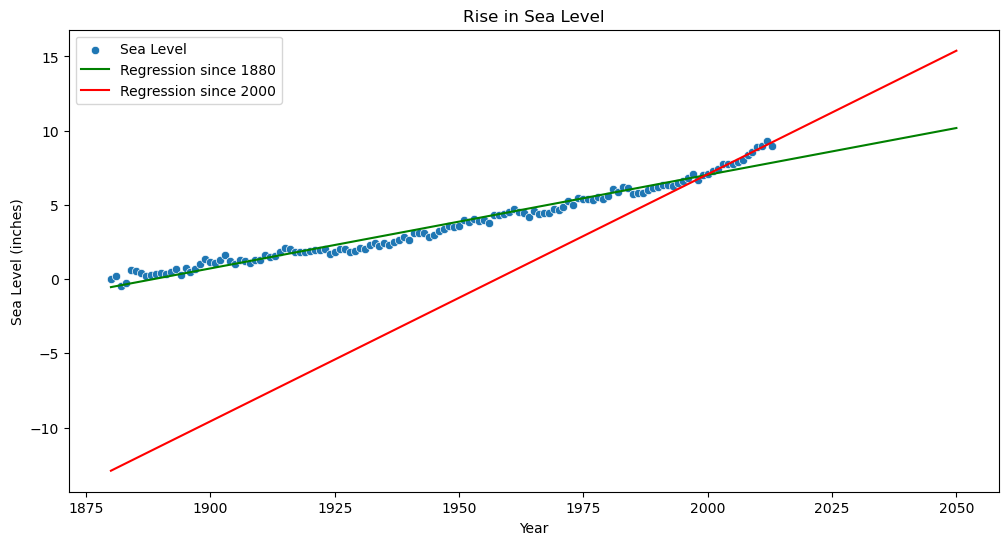

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    # Read data from file
    
    df = pd.read_csv("epa-sea-level.csv")

    years = np.array([i for i in range(1880,2051)])
    
    # Create scatter plot
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    sns.scatterplot(x = 'Year',
                    y = 'CSIRO Adjusted Sea Level',
                    data = df)

    # Create first line of best fit
    
    slope_0 = linregress(df['Year'],df['CSIRO Adjusted Sea Level'])[0]
    intercept_0 = linregress(df['Year'],df['CSIRO Adjusted Sea Level'])[1]
    
    plt.plot(years, (slope_0*years + intercept_0), color = 'green')


    # Create second line of best fit
    
    slope_1 = linregress(df.loc[df['Year'] >= 2000, 'Year'] ,df.loc[df['Year'] >= 2000, 'CSIRO Adjusted Sea Level'])[0]
    intercept_1 = linregress(df.loc[df['Year'] >= 2000, 'Year'] ,df.loc[df['Year'] >= 2000, 'CSIRO Adjusted Sea Level'])[1]
    
    plt.plot(years, (slope_1*years + intercept_1), color = 'red')


    # Add labels and title
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')
    ax.set_title('Rise in Sea Level')
    ax.legend(labels = ['Sea Level','Regression since 1880','Regression since 2000'])

    
    # Save plot and return data for testing (DO NOT MODIFY)
    fig.savefig('sea_level_plot.png')
    return fig.gca()


draw_plot()